In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import pinv
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [3]:
##LOAD DATA
data = np.loadtxt("SANTANG-1 - Copy.las", skiprows=7198)
column = ['DEPTH','CALI','RHOB','DT','DTS','GR','LLD','LLS','MSFL','NPHI','PEF','SP']
data = pd.DataFrame(data, columns=column)
data = data.drop([7420],axis=0)

IV = data[['GR','RHOB','NPHI','LLD','LLS','DT']].values
V = data[['DTS']].values
Depth = data.iloc[:,0].values

    Code                              Lithology
0      1                        ClayeySandstone
1      2                              Sandstone
2      3   Claystone Interbed Shale & Sandstone
3      4             Interbed Sandstone & Shale
4      5               Shale interbed Sandstone
5      6               Sandstone interbed Shale
6      7   Shale interbed Sandstone & Siltstone
7      8  Interbed Shale, Siltstone & Sandstone
8      9              Interbed Sitstone & Shale
9     10   Siltstone interbed Shale & Sandstone
10    11               Siltstone interbed Shale
11    12   Sandstone interbed Claystone & Shale
12    13           Claystone interbed Sandstone
13    14                              Greywacke


C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


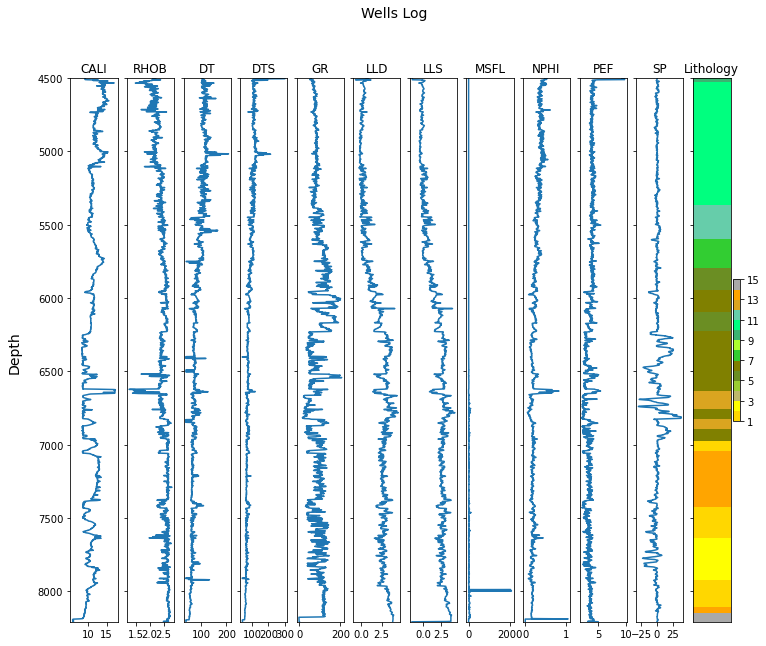

In [4]:
from collections import OrderedDict
from matplotlib.colors import from_levels_and_colors

Code = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
Lit = np.array(['ClayeySandstone','Sandstone','Claystone Interbed Shale & Sandstone','Interbed Sandstone & Shale',
                'Shale interbed Sandstone','Sandstone interbed Shale','Shale interbed Sandstone & Siltstone',
                'Interbed Shale, Siltstone & Sandstone','Interbed Sitstone & Shale','Siltstone interbed Shale & Sandstone',
                'Siltstone interbed Shale','Sandstone interbed Claystone & Shale','Claystone interbed Sandstone','Greywacke'])
Clr = np.array(['gold', 'yellow', 'darkkhaki', 'yellowgreen', 'olivedrab', 'olive', 'limegreen', 'greenyellow', 'mediumseagreen'
                , 'springgreen', 'mediumaquamarine', 'goldenrod', 'orange', 'darkgrey'])
Litho = pd.DataFrame( OrderedDict( (('Code', pd.Series(Code)), ('Lithology', pd.Series(Lit))) ) )
print(Litho)

##Visualisasi Data
well = data[['DEPTH','CALI','RHOB','DT','DTS','GR','LLD','LLS','MSFL','NPHI','PEF','SP']].values
Litologi = np.loadtxt("SantangLitologi.txt", skiprows=7160)
columns = ['DEPTH','Lithology']
Litologi = pd.DataFrame(Litologi, columns=columns)
Lithology = Litologi[['Lithology']].values

row,col = 1,12
fig,ax = plt.subplots(nrows=row,ncols=col,figsize=(12,10),sharey=True)
for i in range (col):
    if i < col-1:
        ax[i].plot(well[:,i+1], well[:,0])
        ax[i].set_ylim(max(well[:,0]), min(well[:,0]))
        ax[i].set_title(column[i+1])
    elif i==col-1:
        x = np.array([0, 20])
        cmap, norm = from_levels_and_colors(Code + [15],Clr)
        a = ax[i].pcolormesh(x[None,:], Depth, Lithology, cmap=cmap, norm=norm)
        ax[i].set(xticks=[], title='Lithology')
        ax[i].invert_yaxis()
        ax[i].set_ylim(max(well[:,0]), min(well[:,0]))
        ax[i].margins(0)
fig.suptitle('Wells Log',fontsize=14)
fig.text(0.06, 0.5, 'Depth', ha='center', va='center', rotation='vertical',fontsize=14)
# fig.legend(handles=ax[11],loc='upper center', bbox_to_anchor=(0.5, 0.05),labels=Lit)
fig.colorbar(a)
plt.show()

In [5]:
data.corr()

,DEPTH,CALI,RHOB,DT,DTS,GR,LLD,LLS,MSFL,NPHI,PEF,SP
DEPTH,1.000000,-0.420701,0.649800,-0.856170,-0.851938,0.058973,0.849105,0.878425,0.212457,-0.734113,-0.443686,-0.082692
CALI,-0.420701,1.000000,-0.361128,0.446332,0.436293,0.335569,-0.574233,-0.554876,-0.100847,0.599022,0.456204,-0.187794
RHOB,0.649800,-0.361128,1.000000,-0.675884,-0.667958,0.373750,0.530808,0.593160,0.150558,-0.692244,-0.213973,-0.082773
DT,-0.856170,0.446332,-0.675884,1.000000,0.909764,-0.071340,-0.875519,-0.894021,-0.176178,0.796797,0.414871,0.033108
DTS,-0.851938,0.436293,-0.667958,0.909764,1.000000,-0.054325,-0.861888,-0.896591,-0.175543,0.816491,0.501562,0.013770
GR,0.058973,0.335569,0.373750,-0.071340,-0.054325,1.000000,-0.159733,-0.088583,0.021076,0.106487,0.352307,-0.142776
LLD,0.849105,-0.574233,0.530808,-0.875519,-0.861888,-0.159733,1.000000,0.987224,0.191018,-0.829151,-0.584264,0.102538
LLS,0.878425,-0.554876,0.593160,-0.894021,-0.896591,-0.088583,0.987224,1.000000,0.196267,-0.846533,-0.594394,0.059369
MSFL,0.212457,-0.100847,0.150558,-0.176178,-0.175543,0.021076,0.191018,0.196267,1.000000,-0.145933,-0.079937,-0.018946
NPHI,-0.734113,0.599022,-0.692244,0.796797,0.816491,0.106487,-0.829151,-0.846533,-0.145933,1.000000,0.590623,-0.047662


<AxesSubplot:>

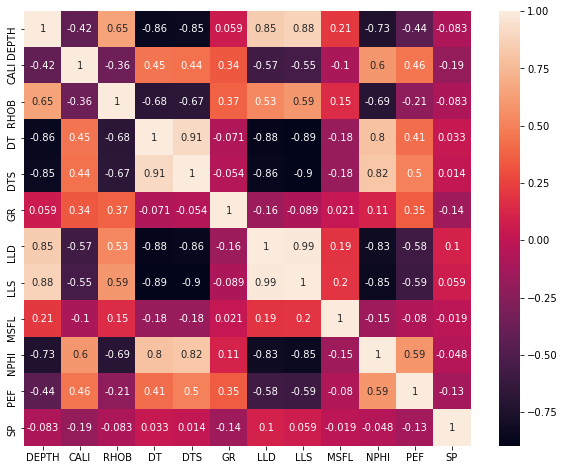

In [7]:
plt.figure(figsize=(10,8))
sb.heatmap(data.corr(), annot=True)

*Coefficient Correlation*
GR: -0.054324904969241826
RHOB: -0.6679584725488587
NPHI: 0.8164909539671116
LLD: -0.8618882205083073
LLS: -0.8965909965635424
DT: 0.9097636656738288


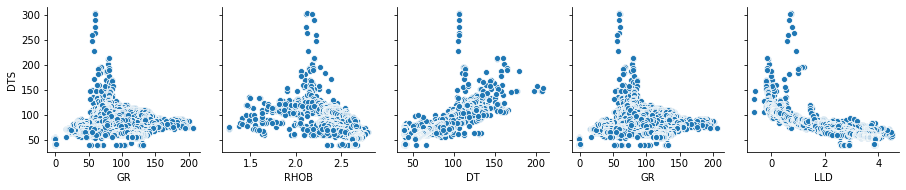

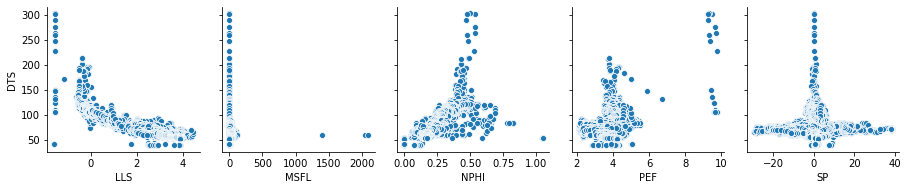

In [6]:
##Correlation
#IV to V
print('*Coefficient Correlation*')
print('GR:',np.corrcoef(IV[:,0],V[:,0])[0,1])
print('RHOB:',np.corrcoef(IV[:,1],V[:,0])[0,1])
print('NPHI:',np.corrcoef(IV[:,2],V[:,0])[0,1])
print('LLD:',np.corrcoef(IV[:,3],V[:,0])[0,1])
print('LLS:',np.corrcoef(IV[:,4],V[:,0])[0,1])
print('DT:',np.corrcoef(IV[:,5],V[:,0])[0,1])

sb.pairplot(data,x_vars=['GR','RHOB','DT','GR','LLD'],y_vars=['DTS'])
sb.pairplot(data,x_vars=['LLS','MSFL','NPHI','PEF','SP'],y_vars=['DTS'])
plt.show()

In [9]:
n = len(IV)
##INDEPENDENT VARIABLES
x = np.zeros(shape=(n,4))
x[:,0] = 1
x[:,1:5] = data[['LLS','NPHI','DT']].values
print('x',x)
# print(data[['LLS','DT','GR']].values)

##DEPENDENT VARIABLES
y = data[['DTS']].values
print('y',y)

x [[ 1.00000000e+00 -1.55131052e+00  5.28542995e-01  1.05949997e+02]
 [ 1.00000000e+00 -1.55107469e+00  5.38124025e-01  1.06352997e+02]
 [ 1.00000000e+00 -1.55088600e+00  5.38124025e-01  1.06756004e+02]
 ...
 [ 1.00000000e+00 -1.59149976e+00 -1.19440000e-03  4.09883003e+01]
 [ 1.00000000e+00 -1.59149976e+00 -1.19440000e-03  4.09883003e+01]
 [ 1.00000000e+00 -1.59149976e+00 -1.19440000e-03  4.09883003e+01]]
y [[226.97099304]
 [263.50601196]
 [275.79598999]
 ...
 [ 40.93830109]
 [ 40.93830109]
 [ 40.93830109]]


In [11]:
##Split Data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=0)
# print(x_train)
# print(x_train.shape)

##TRAINING
xinv = pinv(x_train)
coef = np.matmul(xinv,y_train)
# print(coef)

print('*MLR*')
print('Intercept:',coef[0])
print('Slope:',coef[1],';', coef[2])

*MLR*
Intercept: [43.44526421]
Slope: [-5.26011315] ; [29.17525704]


In [12]:
##Validation
Vs_test = np.matmul(x_test,coef)
print('Vs Measured_test',y_test)
print('Vs Calculated_test',Vs_test)
err = metrics.mean_absolute_error(y_test,Vs_test)
MSE = metrics.mean_squared_error(y_test,Vs_test)
score = metrics.r2_score(y_test,Vs_test)

print('Mean Absolute Error: ',err)
print('Mean Square Error: ', MSE)
print('Score: ', score)

Vs Measured_test [[79.67829895]
 [76.15589905]
 [72.52690125]
 ...
 [71.40550232]
 [74.91639709]
 [78.38930511]]
Vs Calculated_test [[77.73656123]
 [71.16785025]
 [71.7509775 ]
 ...
 [69.79060513]
 [82.86468369]
 [69.86915628]]
Mean Absolute Error:  3.676730156923322
Mean Square Error:  80.85425404321428
Score:  0.8447489551029647


In [15]:
##PREDICTION
Vs_cal = np.matmul(x,coef)
err = metrics.mean_absolute_error(y_test,Vs_test)
MSE = metrics.mean_squared_error(y_test,Vs_test)
score = metrics.r2_score(y_test,Vs_test)

print('Mean Absolute Error: ',err)
print('Mean Square Error: ', MSE)
print('Score: ', score)

Mean Absolute Error:  3.676730156923322
Mean Square Error:  80.85425404321428
Score:  0.8447489551029647


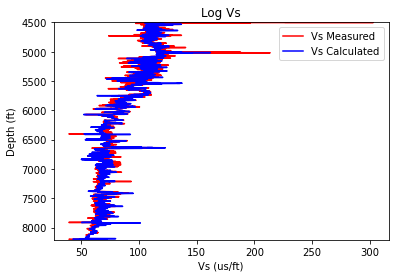

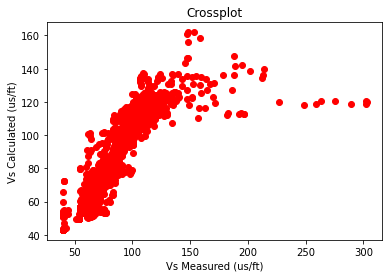

In [14]:
plt.figure()
plt.plot(y,Depth,color='red',label='Vs Measured')
plt.plot(Vs_cal,Depth,color='blue',label='Vs Calculated')
plt.ylim(max(Depth),min(Depth))
plt.title('Log Vs')
plt.ylabel('Depth (ft)')
plt.xlabel('Vs (us/ft)')
plt.legend()
plt.figure()
plt.scatter(y,Vs_cal,color='red',label='data')
plt.title('Crossplot')
plt.xlabel('Vs Measured (us/ft)')
plt.ylabel('Vs Calculated (us/ft)')
plt.show()